In [167]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [168]:
a = QuantumRegister(2, 'control')  # input control register
b = QuantumRegister(1, 'target')  # input control register
m = ClassicalRegister(3, 'output')

In [169]:
qc = QuantumCircuit(a)
qc.add_register(b)
qc.add_register(m)

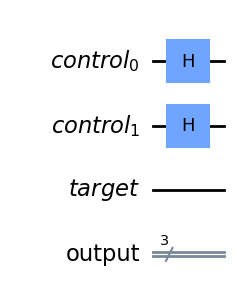

In [170]:
qc.h(a)
qc.draw(output='mpl')

In [171]:
backend =  Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=100)  # shots default = 1024
result = job.result()
U = result.get_unitary(qc, 3)
print(result.get_unitary(qc, 3))

Operator([[ 0.5+0.j,  0.5-0.j,  0.5-0.j,  0.5-0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5-0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0.5+0.j,  0.5-0.j, -0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j,  0. +0.j,  0. +0.j,
            0. +0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5-0.j,
            0.5-0.j,  0.5-0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
            0.5-0.j, -0.5+0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5-0.j,
           -0.5+0.j, -0.5+0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
           -0.5+0.j,  0.5-0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


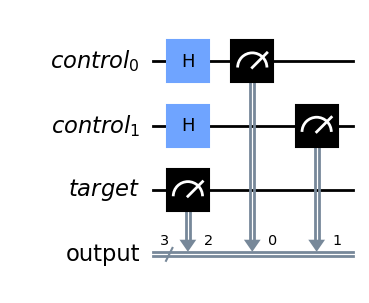

In [172]:
qc.measure(a[0], m[0])
qc.measure(a[1], m[1])
qc.measure(b, m[2])
qc.draw(output='mpl')

In [173]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'011': 25, '001': 24, '010': 27, '000': 24}


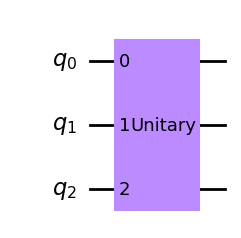

In [174]:
hw_qc = QuantumCircuit(3)
hw_qc.unitary(U, [0, 1, 2])
hw_qc.draw(output='mpl')

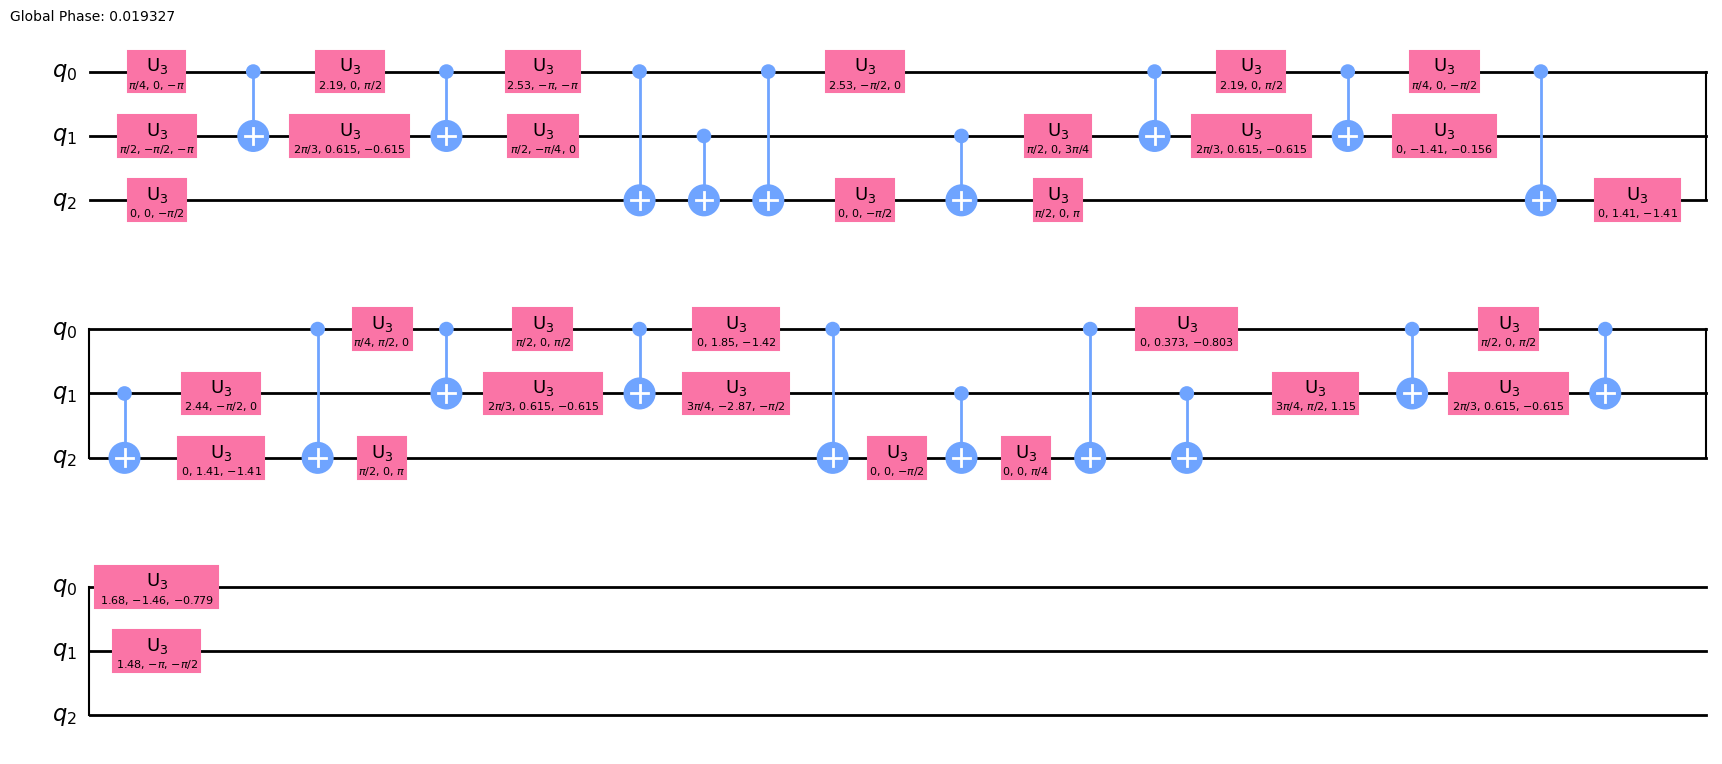

In [175]:
from qiskit.compiler import transpile
trans_qc = transpile(hw_qc, basis_gates = ['cx', 'u3'])
trans_qc.draw(output='mpl')

In [176]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='grad-qc-class')
backend =  provider.get_backend('ibmq_toronto')
job = execute(trans_qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

ibmqfactory.load_account:WARNING:2022-11-05 17:35:15,043: Credentials are already in use. The existing account in the session will be replaced.


{}


In [177]:
print(result)

Result(backend_name='ibmq_toronto', backend_version='1.7.9', qobj_id='44061091-ec77-43fc-95aa-e1bf9acfde95', job_id='6366d7363f04f4542df02fa4', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts={}), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=2.26657807547957, memory_slots=0, metadata={}, n_qubits=27, name='circuit-2201', qreg_sizes=[['q', 27]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26]]), status=done)], date=2022-11-05 18:32:51-04:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_toronto', backend_version='1.7.9'), execution_id='a569f640-5d59-11ed-8885-b02628eaa3aa', time_taken=7.99182653427124, error=None, client_version

In [178]:
backend = Aer.get_backend('statevector_simulator')
job = execute(trans_qc, backend, shots=100)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'000': 0.25, '001': 0.250000000000001, '010': 0.25, '011': 0.249999999999999}
